# Visualization and modeling

Python activities to complement [*Measurements and their Uncertainties*](http://www.oupcanada.com/catalog/9780199566334.html) (*MU*), Chapter 5, "Data visualization and reduction."

* [Preliminaries](#Preliminaries)
* [Importing and exporting data](#Importing-and-exporting-data)
* [Basic plotting](#Basic-plotting)
    * [Example: Demonstrating Ohm's law](#Example&#58;-Demonstrating-Ohm's-law)
        * [Assign data variables](#Assign-data-variables)
        * [Choose the independent and dependent variables](#Choose-the-independent-and-dependent-variables)
        * [Choose the functional relationship to show](#Choose-the-functional-relationship-to-show)
        * [Choose appropriate scales for the axes](#Choose-appropriate-scales-for-the-axes)
        * [Label the axes](#Label-the-axes)
        * [Compare with model](#Compare-with-model)
        * [Export and check format](#Export-and-check-format)
        * [Adjust format as necessary](#Adjust-format-as-necessary)
* [Linearizing relationships](#Linearizing-relationships)
    * [Semilogarithmic plots](#Semilogarithmic-plots)
    * [Log-log plots](#Log-log-plots)
* [Linear fits](#Linear-fits)
    * [Explicit formulas](#Explicit-formulas)
    * [Matrix representation](#Matrix-representation)
    * [Least-squares and maximum likelihood](#Least-squares-and-maximum-likelihood)
* [Residual analysis](#Residual-analysis)
    * [Use residuals to check the model](#Use-residuals-to-check-the-model)
    * [Use residuals to improve the model](#Use-residuals-to-improve-the-model)
* [Summary](#Summary)

## Preliminaries
Before proceeding with this notebook you should review the topics from the [previous notebook](4.0-Error-propagation.ipynb) and read *MU* Ch. 5, "Data visualization and reduction," with the following [goals](https://wiki.its.sfu.ca/departments/phys-students/index.php/Reading_goals_for_Hughes_and_Hase#Data_visualization_and_reduction) in mind.

1. Be able to recall the "Guidelines for plotting data" in Sec. 5.1, and apply them to your own graphs.
2. Be able to compute appropriate error bars for data in a graph.
3. Be able to assess the quality of a fit from the fraction of data points that lie within one standard error bar from the fitted curve.
4. Recognize that a least-squares fit to a line can be computed from the data using Eqs. (5.1) - (5.6).
5. Be able to explain the meaning and significance of the following terms:
    1. Interpolate;
    2. Extrapolate;
    3. Aliasing;
    4. Residual;
    5. Method of least squares; and
    6. Goodness-of-fit parameter.
6. Be able to explain why the likelihood $P\left(m,c\right)$ in (5.8) is maximized when *&chi;*<sup>2</sup> in (5.9) is minimized, and discuss how this provides a rationale for using *&chi;*<sup>2</sup> to determine optimal fit parameters.
7. Know how to graph data to help identify systematic errors.

The following code cell includes previously used initialization commands that we will need here.

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

%matplotlib inline

## Importing and exporting data
Normally we record experimental data in a computer file of some sort, so we will pause here to discuss the NumPy functions [`genfromtxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html) and [`savetxt`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html) that read and write, respectively

### Export

In [51]:
# Load data
data = np.genfromtxt('data/resistance.csv', skip_header=1, delimiter=',')

## Basic plotting

### Example: Demonstrating Ohm's law
Consider the data tabulated in Prob. (5.3), taken from an experiment to verify Ohm's law. In the following code cells we will develop a plot that demonstrates Ohm's law and compares the resistance measurements to our expectations for a 100&nbsp;&Omega; resistor.

#### Assign data variables
Start by assigning the data to [NumPy arrays](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html) (recall from the [Programming notes 3](4.0-Error-propagation.ipynb#Programming-notes-3) section in the last notebook that mathematical operations are defined with NumPy arrays that are not defined for Python lists).

In [67]:
# Load data
current, voltage, alpha_voltage = np.genfromtxt('data/resistance.csv', skip_header=1, delimiter=',',unpack=True)

#### Choose the independent and dependent variables
The problem states that the voltmeter precision is 0.01 mV, and that the uncertainty in the current is negligible. This suggests we use the current as the independent variable and use an [`errorbar`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html?highlight=errorbar) plot to show the voltage uncertainty.

#### Choose the functional relationship to show
Ohm's law is a linear relationship, so we will just plot the voltage directly as a function of current. Later we will see how to demonstrate certain types of nonlinear relationships by *linearizing* the data.

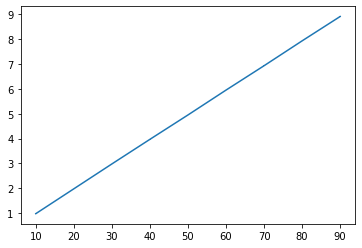

In [70]:
# Plot data
plt.errorbar(current, voltage, yerr=alpha_voltage);

#### Choose appropriate scales for the axes
Ohm's law states that the voltage should be not just linear in the current, but *proportional* to it, so a line through the data should pass through the origin. We can then provide the viewer with an implicit test of the model by extending the plot range to place the origin at the lower left corner of the plot. The upper limits of both the voltage and current are less critical, but they are both close to a power of 10 so we will adjust these, too.

Note also that the default behavior of `errorbar` is to plot the data points *without markers* and to connect them with straight line segments. Generally it is better to represent data like this *with markers* that are large enough for the viewer to see easily and to leave them *disconnected* so that we can use lines to represent a model fit to the data. The error bars are very small on the scale of the plot, so we will switch over to the regular [`plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) command—we can inform the reader of the voltage uncertainty with text.

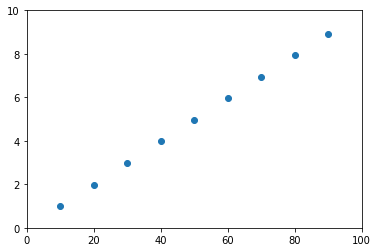

In [4]:
# Plot data with circular markers
plt.plot(current, voltage, 'o');

# Set axis limits to include origin
plt.xlim(0,100)
plt.ylim(0,10);

#### Label the axes
Now label the axes, including appropriate units. Avoid units that cause your axes to have scales that require either that the tick labels have excessive zeros before the decimal (i.e., 0.0001, 0.0002, ...) or that the entire range must be represented with scientific notation (i.e., 1.0 &times; 10<sup>9</sup>, 2.0 &times; 10<sup>9</sup>, ..., which would be represented as 1.0, 2.0,..., with the 10<sup>9</sup> located at the end of the axis where it could easily be missed). Matplotlib supports $\LaTeX$ expressions enclosed by dollar signs, so we write `$\mu$A` for microamperes—Matplotlib also supports [unicode](https://en.wikipedia.org/wiki/Unicode), so you can enter the `µ` with your keyboard if it is available.

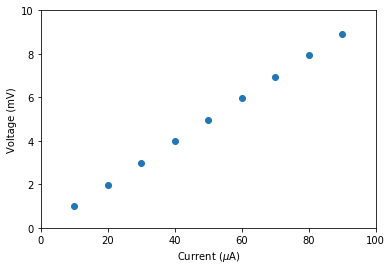

In [5]:
# Plot data with circular markers
plt.plot(current, voltage, 'o');

# Set axis limits to include origin
plt.xlim(0,100)
plt.ylim(0,10);

# Add axis labels
plt.xlabel('Current ($\mu$A)')
plt.ylabel('Voltage (mV)');

#### Compare with model
We will discuss how to fit a model to data shortly; for now, we just compare the data with the hypothesis that the resistance is 100&nbsp;&Omega;. If you look carefully you will see that the data fall consistently below the model line, indicating that the measured resistance is slightly less than 100&nbsp;&Omega;. This discrepancy would be revealed more clearly in a residual plot, which we will discuss below.

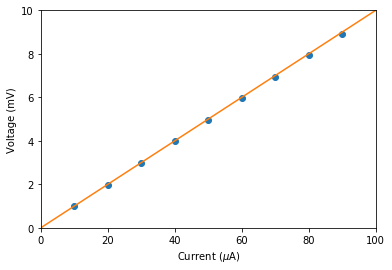

In [6]:
# Plot data with circular markers
plt.plot(current, voltage, 'o');

# Model behavior expected for R = 100 Ohms
R_model = 100
current_model = np.linspace(0,100)
voltage_model = 100*(1e-6*current_model)*1e3

# Plot model with a solid line
plt.plot(current_model, voltage_model, '-');

# Set axis limits to include origin
plt.xlim(0,100)
plt.ylim(0,10);

# Add axis labels
plt.xlabel('Current ($\mu$A)')
plt.ylabel('Voltage (mV)');

#### Annotate plot
How you annotate a plot will depend on the context. Normally a laboratory notebook should include figures with titles, while research papers and formal laboratory reports should include explanatory information in captions instead of titles. Oral presentation slides typically have their own titles, but sometimes it is useful to include titles for individual figures in a group. Legends are usually acceptable in any context as long as they don't occupy too much space—otherwise, use a caption to describe marker and line associations.

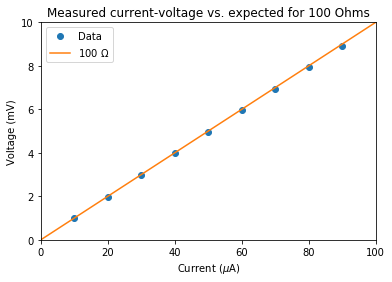

In [7]:
# Plot data with circular markers
plt.plot(current, voltage, 'o');

# Model behavior expected for R = 100 Ohms
R_model = 100
current_model = np.linspace(0,100)
voltage_model = 100*(1e-6*current_model)*1e3

# Plot model with a solid line
plt.plot(current_model, voltage_model, '-');

# Set axis limits to include origin
plt.xlim(0,100)
plt.ylim(0,10);

# Add axis labels
plt.xlabel('Current ($\mu$A)')
plt.ylabel('Voltage (mV)');

# Add legend
plt.legend(['Data','100 $\Omega$'])

# Add title
plt.title('Measured current-voltage vs. expected for 100 Ohms');

#### Export and check format
The command [tight_layout](https://matplotlib.org/api/tight_layout_api.html) crops the figure for export.

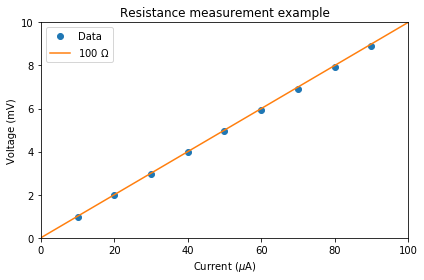

In [8]:
# Plot data with circular markers
plt.plot(current, voltage, 'o');

# Model behavior expected for R = 100 Ohms
R_model = 100
current_model = np.linspace(0,100)
voltage_model = 100*(1e-6*current_model)*1e3

# Plot model with a solid line
plt.plot(current_model, voltage_model, '-');

# Set axis limits to include origin
plt.xlim(0,100)
plt.ylim(0,10);

# Add axis labels
plt.xlabel('Current ($\mu$A)')
plt.ylabel('Voltage (mV)');

# Add legend
plt.legend(['Data','100 $\Omega$'])

# Add title
plt.title('Resistance measurement example');

# Crop figure
plt.tight_layout();

# Save PDF for notebook
plt.savefig('resistance_notebook.pdf')

#### Adjust format as necessary
A report that uses 8.5" x 11" paper with 1" margins has a 6.5" text width. We set the figure width to 80% of this and set the height to yield an overall 3:2 aspect ratio. Normally the font sizes for the axis labels, tick labels, and legend should be the same or less than that of the report text, which we assume here is 12 [points](https://en.wikipedia.org/wiki/Point_%28typography%29) (1 point = 1/72 inch). We also explicitly set the data marker size to 5 points and the model line width to 1.25 points—normally, the default marker size is 6 points and the default line width is 1.5 points. Finally, we set [`zorder=3`](https://matplotlib.org/gallery/misc/zorder_demo.html) in the first call to `plot` to put the markers on top of the model line (alternatively, we could also just change the order of the `plot` commands).

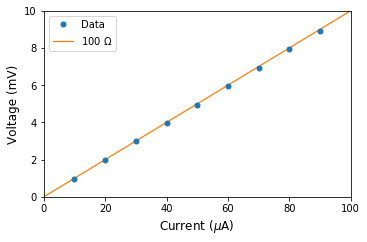

In [9]:
# Set figure width to 80% of the 6.5" text width
w_text = 6.5
w = 0.8*w_text
h = (2.0/3.0)*w
fig = plt.figure(figsize=(w,h))

# Plot data with circular markers
# Set zorder=3 to put markers on top of model curve
# Set marker size to 4 points
plt.plot(current, voltage, 'o', markersize=5, zorder=3);

# Model behavior expected for R = 100 Ohms
R_model = 100
current_model = np.linspace(0,100)
voltage_model = 100*(1e-6*current_model)*1e3

# Plot model with a solid line
plt.plot(current_model, voltage_model, '-', linewidth=1.25);

# Set axis limits to include origin
plt.xlim(0,100)
plt.ylim(0,10);

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Add axis labels
plt.xlabel('Current ($\mu$A)', fontsize=12)
plt.ylabel('Voltage (mV)', fontsize=12);

# Add legend
plt.legend(['Data','100 $\Omega$'], fontsize=10)

# Crop figure
plt.tight_layout();

# Save PDF for article
plt.savefig('resistance_report.pdf')

### Linearizing relationships
Linearizing a graph can be a very effective way to demonstrate the validity of certain functional relationships between two quantities. Consider first the example given in *MU* Sec. 5.1.2, the period *T* of a pendulum as a function of its length *L*. Use the random number generator to simulate period measurements with a constant standard error *&alpha;<sub>T</sub>*&nbsp;=&nbsp;0.05&nbsp;s, with pendulum lengths ranging from 10&nbsp;cm to 100&nbsp;cm. Use `T` for the model prediction, and `Tm` for the simulated measurements. 

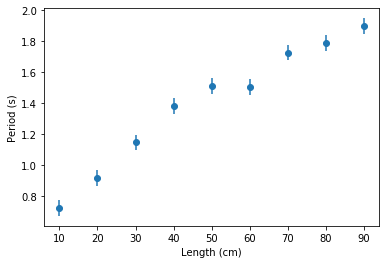

In [53]:
# Assign variables
g = 9.8 # (m/s^2)
L = np.arange(10, 100, 10)  # (cm)
T = 2*np.pi*np.sqrt((L/100)/g)  # (s)
alpha_t = 0.05 # (s)

# Seed RNG and simulate data
np.random.seed(0)

Tm = T + alpha_t * np.random.randn(np.size(T))

# Make plot
plt.errorbar(L, Tm, yerr=alpha_t, fmt='o');
plt.xlabel('Length (cm)')
plt.ylabel('Period (s)');

Now plot `Tm**2` versus `L` to linearize the graph. Remember that we also need to propagate the uncertainty in `Tm` to produce the correct uncertainty in `Tm**2`; we'll use the calculus-based method of Sec. 4.1.2.

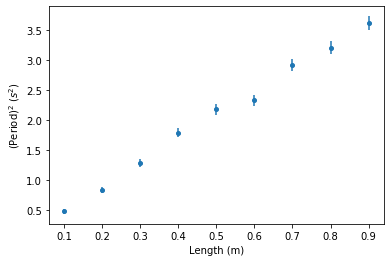

In [20]:
Tm_sq = Tm**2
alpha_tm_sq = 2 * alpha_t * Tm

plt.errorbar(L, Tm_sq, alpha_tm_sq, fmt='o', markersize=4)
plt.xlabel('Length (m)')
plt.ylabel('(Period)$^2$ ($s^2$)');

### Semilogarithmic plots
Yet another common linearization method uses the `semilogx` and `semilogy` functions, which is useful to demonstrate an *exponential* functional dependence. Consider, for example, the voltage across a 47 nF capacitor as it discharges from an initial value of 1 V across a 100 k&Omega; resistor. Add noise with a 10 microvolt amplitude using the random number generator.

In [40]:
x = np.linspace(0,100)    # s
R = 100e3             # Ohm
C = 47e-9             # Farad
tau = R * C * 1000         # ms
V0 = 1                 # V
alphaV = 10e-6         # V

V = V0*np.exp(-x/tau)
Vm = V + alphaV*np.random.randn(np.size(V))

First plot the data using linear scales.

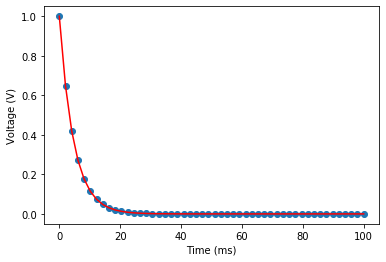

In [14]:
plt.plot(x,Vm,'o',x,V,'r-')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)');

Now plot the data using a semilogarithmic scale.

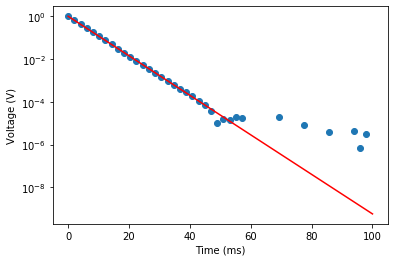

In [15]:
plt.semilogy(x,Vm,'o',x,V,'r-')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)');

The linear plot shows little variation for *t* greater than 20 ms, while the semilogarithmic plot allows this data to be visualized much more effectively. The model function appears as a straight line on the `semilogy` plot, while the data follows a straight line for *t* less than about 50 ms. As *t* increases above 50 ms, the noise begins to dominate and the voltage fluctuates randomly with a 10 microvolt width about zero. About half of these fluctuations have negative values that are excluded from the plot because their logarithm is undefined.

Most of the remaining positive values are greater than 1 microvolt: with 10 microvolt Gaussian noise centered at zero, it is more than ten times more likely that the voltage will be greater than one microvolt than between one microvolt and zero.

### Using a graph to see trends in the data
Reproduce Fig. 5.5. The text gives the fit parameters, and we can estimate the noise level from the tail in Fig. 5.5(b).

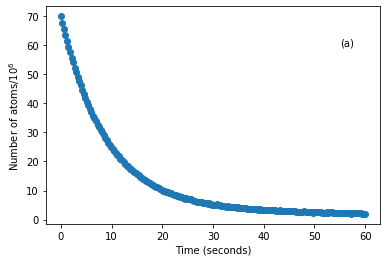

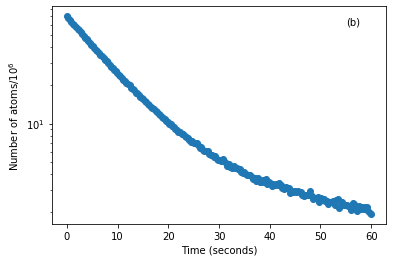

In [27]:
###### since tau values are constants we can definde them in a tuple.
tau = (8.67, 67)
# amplitudes are also not supposed to chage - suggest to define them as tuple.
a = (6.5e7, 0.5e7)

alpha_n = 1e5

alhpa_tau = (0.04, 4)
# number of point to be simulated
n_points = 200
# generate evenly spaced points to represent x axis
x = np.linspace(0, 60, n_points)

# calculate corresponding n values for each x value using the exponential decaly (theoretical values)
n = a[0]*np.exp(-x / tau[0]) + a[1] * np.exp(-x / tau[1])
# add noise to the teoritical values
nm = n + alpha_n * np.random.randn(len(n))

# plot the results
plt.plot(x, nm / 1e6, 'o')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of atoms/$10^6$')
plt.text(55, 60, '(a)');
plt.show()


# plot the same results in a semi-log plot
# plot the results
plt.semilogy(x, nm / 1e6, 'o')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of atoms/$10^6$')
plt.text(55, 60, '(b)');
plt.show()

To show the trend lines in Fig. 5.5(c), fit separately to the data for *t < 20* and *t > 40*. Use [logical indexing]() to select data in these two ranges. To see how logical indexing works, consider the following expressions.

In [28]:
seq = np.arange(0, 10)
print(seq)
# find the index of all values that are > 5
print(seq > 5)
# return all the values that are > 5
print(seq[seq > 5])
# find the index of all values that are <5
print(seq < 5)
# return all the values that are < 5
print(seq[seq < 5])

[0 1 2 3 4 5 6 7 8 9]
[False False False False False False  True  True  True  True]
[6 7 8 9]
[ True  True  True  True  True False False False False False]
[0 1 2 3 4]


The expression *seq > 5* evaluates the inequality for each element of *seq* to assign a *true* or *false* value to the corresponding element in a boolean array of the same size. The expression *seq(seq > 5)*, then, returns only those elements of *seq* for which *seq > 5* is *true*.
Now use it this to fit to *t < 20* and *t > 40*.

Your turn: make a plot of the current through an ideal diode as a function of applied voltage.

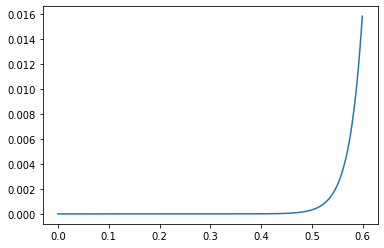

In [18]:
v = np.arange(0, 0.6, 0.001)   # V

k_b= 1.3806e-23     # J/K
q_e = 1.6022e-19    # C
T_r = 296           # Room temperature, in degrees Kelvin

v_t = k_b*T_r/q_e   # Thermal voltage, in Volts
i_s = 1e-12         # Saturation current, in Amperes

i = i_s*(np.exp(v/v_t) -1)
plt.plot(v, i);

### Log-log plots
Yet another way to linearize the same data is to use a [`loglog`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.loglog.html) plot. These are useful for identifying a power-law relationship between two quantities, i.e.,

$$y = A x^\alpha $$

where $A$ and $\alpha$ are unknown. Taking the logarithm of both sides yields a linear relatonship between $y$ and $x$:
$$\log y = \log A + \alpha \log x $$

Use `loglog` to demonstrate this with the `L`, `Tm` data. Show the data as circles (`o`), and add a red line (`r-`) to show the model behavior, *T*, and a blue dashed line (`b--`) to show `sqrt(L)`, to demonstrate the advantage of using `loglog` to identify a power-law functional dependence. The data fall approximately on a straight line, with a *slope* similar to the plot of `sqrt(L)` versus `L`.

Text(0, 0.5, 'Period (s)')

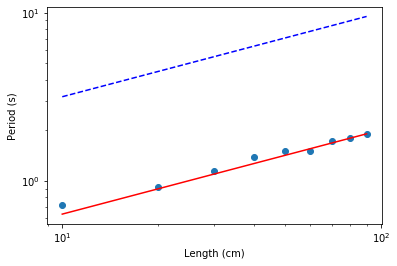

In [49]:
plt.loglog(L, Tm, 'o', L, T, 'r-', L, np.sqrt(L), 'b--')
plt.xlabel('Length (cm)')
plt.ylabel('Period (s)')

## Linear fits

### Explicit formulas

## 5.2.1 Adding a linear trend line
Determine the best linear fit to the current-voltage data of Sec. 5.1.1, using Eqs. (5.1) and (5.2) to get the intercept and slope; then, get parameter uncertainties from Eqs. (5.3) and (5.4), and relate them to the confidence bounds that Python gives.
The current (in µA) is the independent variable, which corresponds to $x$ in Eqs. (5.1) and (5.2). The voltage (in mV) is the dependent variable, which corresponds to $y$. Use the colon operator to put the data in column-vector format, so we can use it with the *fit* function.

In [29]:
n = len(current)
delta = n * np.sum(current**2) - np.sum(current)**2
c_fit = (np.sum(current**2) * np.sum(voltage) - np.sum(current) * np.sum(current*voltage)) / delta
m_fit = (n * np.sum(current*voltage) - np.sum(current) * np.sum(voltage)) / delta

alpha_cu = np.sqrt(np.sum((voltage - m_fit * current - c_fit)**2) / (n - 2))

alphac = alpha_cu * np.sqrt(np.sum(current**2) / delta)
alpham = alpha_cu * np.sqrt(n/ delta)

print('voltage = mFit*current + cFit, fit with Eqs. (5.1) and (5.2)\n')
print('Best-fit parameters +/- one-sigma uncertainty:\n')
print('mFit:\t %.4g +/- %.4g\n',m_fit,alpham)
print('cFit:\t %.4g +/- %.4g\n',c_fit,alphac)

voltage = mFit*current + cFit, fit with Eqs. (5.1) and (5.2)

Best-fit parameters +/- one-sigma uncertainty:

mFit:	 %.4g +/- %.4g
 0.09908333333333333 9.236745114891226e-05
cFit:	 %.4g +/- %.4g
 -0.0008333333333333334 0.005197806822804966


Compare this with the result from the fit function. Plot the fit and show the residuals separately.

In [30]:
def model(x, a, b):
    return a * x + b
popt, pcov = curve_fit(model, current,voltage)
print(popt, pcov)

[ 0.09908333 -0.00083333] [[ 8.53118679e-09 -4.26556018e-07]
 [-4.26556018e-07  2.70154764e-05]]


Text(0, 0.5, 'Residuals (mV)')

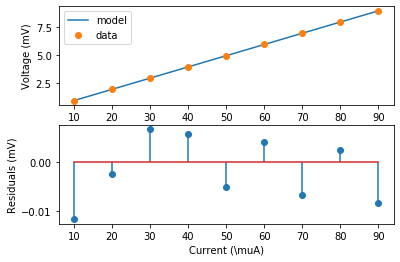

In [31]:
plt.subplot(2, 1, 1)
plt.plot(current, current * popt[0] + popt[1], current, voltage, 'o')
plt.legend(['model', 'data'])
plt.ylabel('Voltage (mV)')
plt.subplot(2, 1, 2)
plt.stem(current, voltage - current * popt[0] + popt[1],
        use_line_collection=True);

plt.xlabel('Current (\muA)')
plt.ylabel('Residuals (mV)')

### Matrix representation

### Least-squares and maximum likelihood

## Residual analysis

### Use residuals to check the model

### Use residuals to improve the model

## Summary

## Further reading

##### About this notebook
Notebook by J. S. Dodge, 2019. Available from [SFU GitLab](https://gitlab.rcg.sfu.ca/jsdodge/data-analysis-python). The notebook text is licensed under the Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License. See more at [Creative Commons](http://creativecommons.org/licenses/by-nc-nd/4.0/). The notebook code is open source under the [MIT License](https://opensource.org/licenses/MIT).